# Import Necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1.Data Collection

In [29]:
pd.set_option('display.max_column',18)

In [30]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [31]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# 2.Data Understanding

In [3]:
zoo.shape


(101, 18)

In [4]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [7]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [14]:
zoo['animal name'].value_counts()

frog        2
flamingo    1
seasnake    1
skua        1
antelope    1
           ..
hare        1
pitviper    1
sealion     1
crow        1
duck        1
Name: animal name, Length: 100, dtype: int64

In [12]:
animal = zoo['animal name'].nunique()
animal

100

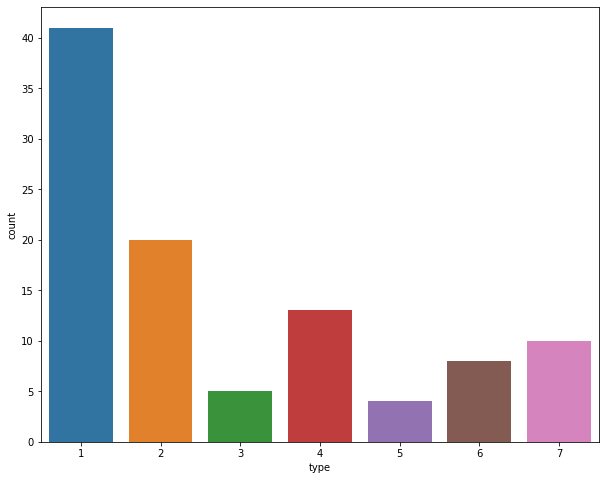

In [37]:
plt.figure(figsize=(10.,8))
sns.countplot(zoo.type)
plt.show()

In [18]:
zoo.venomous.value_counts()

0    93
1     8
Name: venomous, dtype: int64

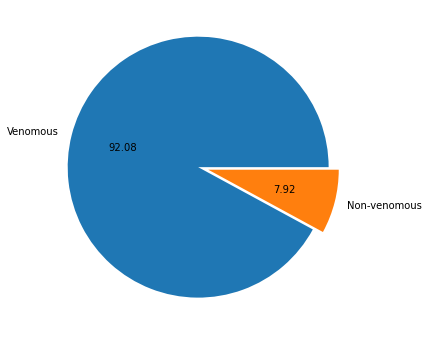

In [23]:
plt.figure(figsize=(8,6))
plt.pie(zoo.venomous.value_counts(),labels=['Venomous','Non-venomous'],autopct='%.2f',explode = [0.08,0])
plt.show()

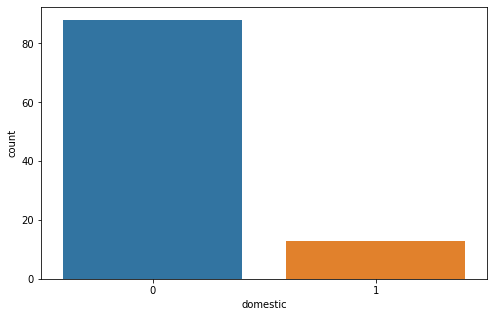

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(zoo.domestic)
plt.show()

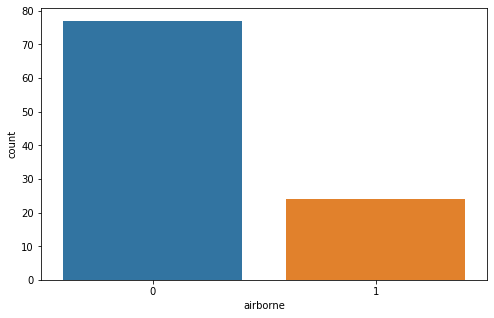

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(zoo.airborne)
plt.show()

# 3.Data Preparation

In [51]:
del zoo['animal name']

In [52]:
X = zoo.drop('type',axis=1)
y = zoo[['type']]


In [53]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_scaled = std.fit_transform(X)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,random_state=12,test_size=.10,stratify=y)

In [55]:
X_train.shape,y_train.shape

((90, 16), (90, 1))

In [56]:
X_test.shape,y_test.shape

((11, 16), (11, 1))

# 4.Model Building

In [57]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=knn,param_grid={'n_neighbors':[2,3,4,5,6,7,8,9,10]},cv = 5)

grid.fit(X_scaled,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [58]:
grid.best_params_

{'n_neighbors': 2}

In [59]:
grid.best_score_

0.9400000000000001

# 5 .Model Training

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# 6.Model Testing

#### Training data

In [61]:
y_pred_train=knn.predict(X_train)
y_pred_train

array([1, 7, 4, 7, 2, 2, 4, 1, 6, 1, 1, 4, 6, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 7, 1, 4, 2, 4, 5, 2, 5, 6, 1, 4, 4, 7, 1, 1, 7, 5, 2, 3, 1,
       7, 5, 1, 2, 1, 6, 1, 1, 2, 6, 7, 1, 1, 1, 1, 1, 2, 2, 2, 1, 7, 1,
       2, 6, 2, 6, 1, 1, 1, 4, 1, 4, 1, 2, 1, 4, 2, 3, 5, 4, 6, 1, 2, 1,
       4, 2], dtype=int64)

#### testing Data

In [62]:
y_pred_test=knn.predict(X_test)
y_pred_test

array([1, 4, 7, 6, 1, 2, 1, 1, 2, 1, 2], dtype=int64)

# 7.Model Evaulation

In [63]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,roc_auc_score

##### Training data

In [64]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('confusion matrix:\n',confusion_matrix(y_train,y_pred_train))
print('r2_score:',r2_score(y_train,y_pred_train))

accuracy score: 0.9666666666666667
classification_report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        36
           2       0.95      1.00      0.97        18
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00        12
           5       0.80      1.00      0.89         4
           6       0.88      1.00      0.93         7
           7       1.00      0.89      0.94         9

    accuracy                           0.97        90
   macro avg       0.95      0.91      0.91        90
weighted avg       0.97      0.97      0.96        90

confusion matrix:
 [[36  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0]
 [ 0  1  2  0  1  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  7  0]
 [ 0  0  0  0  0  1  8]]
r2_score: 0.9848148252298867


##### Test data

In [65]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_test))
print('r2_score:',r2_score(y_test,y_pred_test))

accuracy score: 0.9090909090909091
classification_report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.91        11
   macro avg       0.78      0.83      0.80        11
weighted avg       0.85      0.91      0.87        11

confusion matrix:
 [[5 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]
r2_score: 0.978515625


In [66]:
from sklearn.model_selection import cross_val_score

cv_scores = []

for i in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cv_score_validation = cross_val_score(estimator=knn_model,X=X_scaled,y= y,cv=5)
    cv_scores.append(cv_score_validation.mean())

In [67]:
cv_scores

[0.9504761904761905,
 0.9304761904761906,
 0.9400000000000001,
 0.9200000000000002,
 0.8604761904761906,
 0.8804761904761905,
 0.8604761904761904,
 0.8609523809523809,
 0.8614285714285714,
 0.8614285714285714,
 0.8519047619047619,
 0.8219047619047618,
 0.8019047619047619,
 0.7823809523809524,
 0.7823809523809524]

In [68]:
np.argmax(cv_scores),np.max(cv_scores)

(0, 0.9504761904761905)

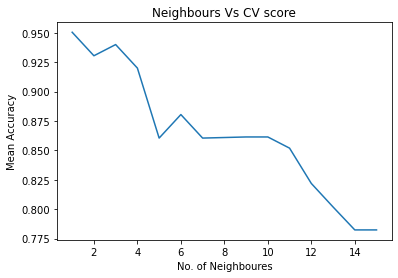

In [78]:
plt.plot(range(1,16),cv_scores)
plt.title('Neighbours Vs CV score')
plt.xlabel('No. of Neighboures')
plt.ylabel('Mean Accuracy')
plt.show()

# k = 5 is overfitting
# Therefore, using k = 3